In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df[df.duplicated()]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1

In [6]:
df.drop_duplicates(keep = 'first', inplace = True)

206 96


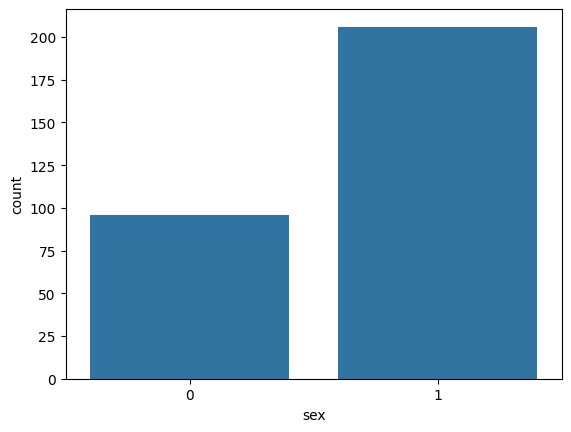

In [9]:
x = (df.sex.value_counts())
print(x[1], x[0])
p = sns.countplot(data = df, x = 'sex')
plt.show()

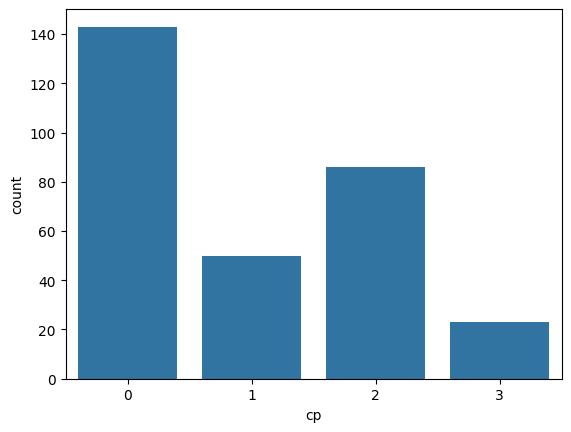

In [10]:
x = (df.cp.value_counts())
p = sns.countplot(data = df, x = 'cp')
plt.show()

<Figure size 1000x1000 with 0 Axes>

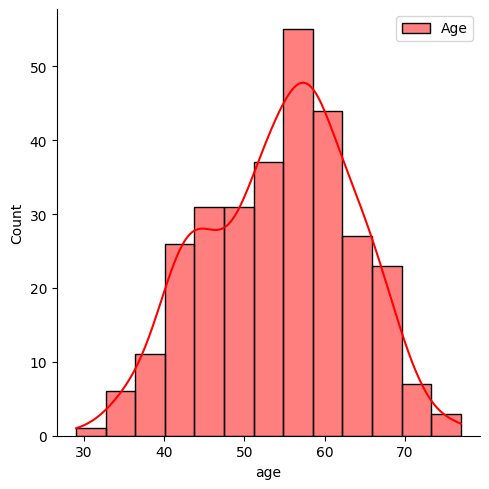

In [16]:
plt.figure(figsize=(10,10))
sns.displot(df.age, color= 'red', label = 'Age', kde = True )
plt.legend()

<Figure size 1000x1000 with 0 Axes>

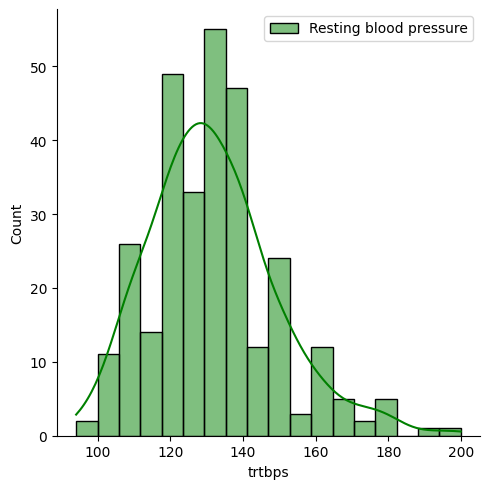

In [19]:
plt.figure(figsize = (10,10))
sns.displot(df.trtbps, color = 'green', label= 'Resting blood pressure', kde = True)
plt.legend()

C:\Users\krish\AppData\Local\Temp\ipykernel_3316\429142574.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['output'] == 0]['age'], color = 'green', kde=True)
C:\Users\krish\AppData\Local\Temp\ipykernel_3316\429142574.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['output'] =

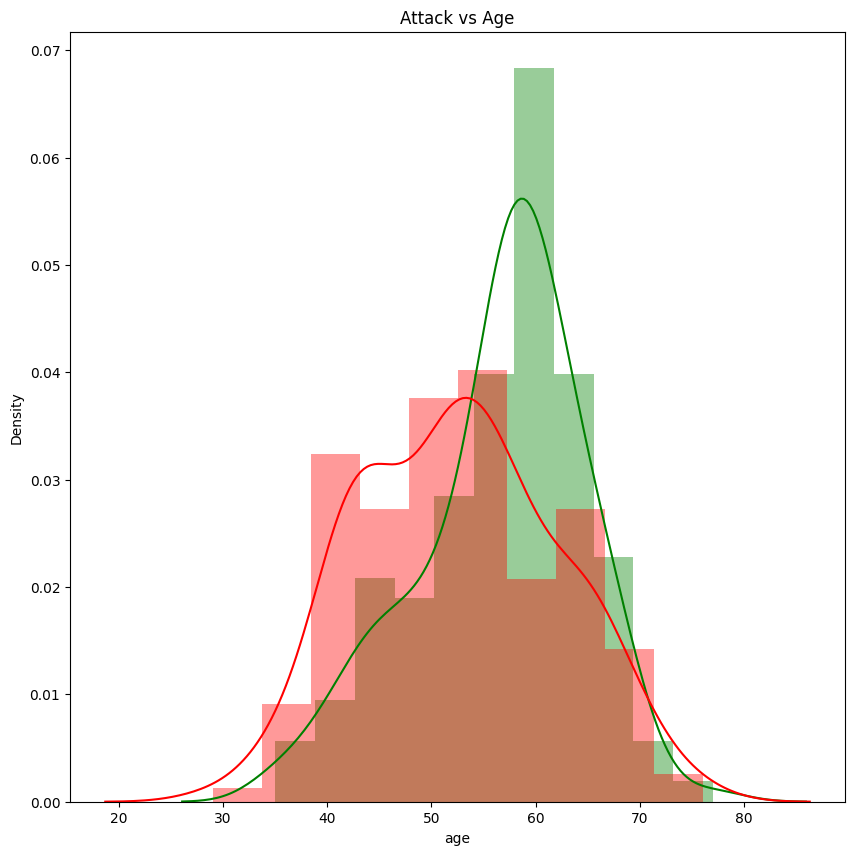

In [21]:
plt.figure(figsize = (10,10))
sns.distplot(df[df['output'] == 0]['age'], color = 'green', kde=True)
sns.distplot(df[df['output'] == 1]['age'], color = 'red', kde=True)
plt.title("Attack vs Age")
plt.show()

C:\Users\krish\AppData\Local\Temp\ipykernel_3316\524492839.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['output'] == 0]['chol'], color = 'green', kde=True)
C:\Users\krish\AppData\Local\Temp\ipykernel_3316\524492839.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['output'] 

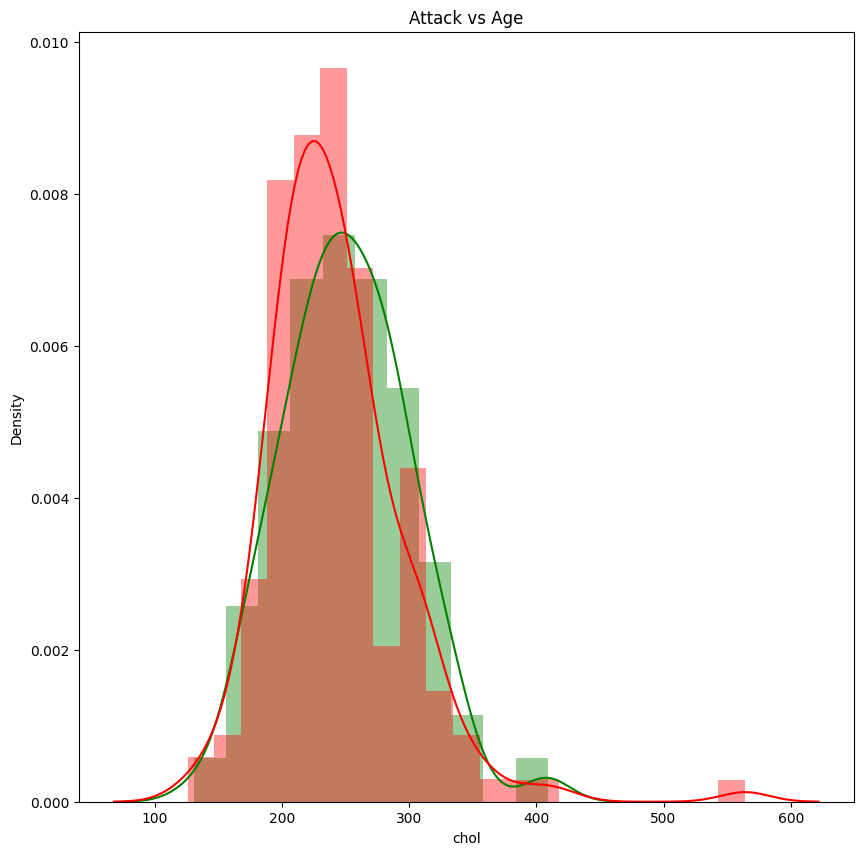

In [22]:
plt.figure(figsize = (10,10))
sns.distplot(df[df['output'] == 0]['chol'], color = 'green', kde=True)
sns.distplot(df[df['output'] == 1]['chol'], color = 'red', kde=True)
plt.title("Attack vs Age")
plt.show()

In [23]:
y = df.iloc[:, -1].values
x = df.iloc[:, 1:-1].values

In [24]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state= 42)

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [49]:
pred = gnb.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.8461538461538461
